## Mahmoud Emara

### Mini Jupyter Exercise #5
### Standardization of Data
#### 1. Center the wine dataset so that each attribute has zero (empirical) mean.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import array
from sklearn.datasets import load_wine
import math
samples, labels = load_wine(return_X_y=True)

sampleT = samples.T
meanVector = sampleT.mean(axis=1)
# Number of instances: 178
# Number of Attributes: 13
meanMatrix = np.tile(meanVector.reshape(13,1),(1,178))
centData = sampleT - meanMatrix

print("Dataset dimensions: ", samples.shape)
print("Mean Matrix dimensions: ", meanMatrix.shape)
print("Centered dataset: ", centData.shape)

Dataset dimensions:  (178, 13)
Mean Matrix dimensions:  (13, 178)
Centered dataset:  (13, 178)


#### 2. Compute two-dimensional PCA features of the centered wine dataset. Display the two-dimensional features of wine data samples as points on a two-dimensional scatter plot. Display all points corresponding to: (i) label ‘0’ as red squares, (ii) label ‘1’ as green triangles, and (iii) label ‘2’ as blue circles.

In [1]:
# Singular Value Decomposition

U, s, Vt = np.linalg.svd(centData)
princ = U[:,0:2]

print("Dimension of dataset: ", samples.shape)
print("Dimension of transposed data set: ", samples.T.shape)
print("Dimensions of top 2 Princinpal Componenets: ", princ.shape)
print()

# Top 2 Principal Components
print("Top 2 Principal Components of data matrix: ")
print(princ)
print()

# PCA-based features
print("Features: U.T * Centered Data: ",princ.T.shape,"x",centData.shape)
X_tilde = np.matmul(princ.T, centData)
print("The projected data using the top principal components: ")
print(X_tilde.T)
print("X_tilde dimensions: ",X_tilde.T.shape)

NameError: name 'np' is not defined

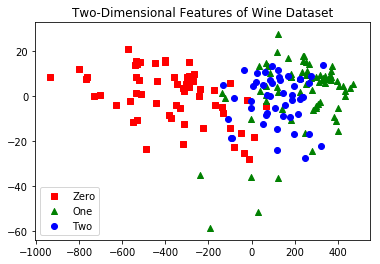

In [3]:
zeroX = list()
zeroY = list()

oneX = list()
oneY = list()

twoX = list()dat
twoY = list()

for i in range(len(samples)):
    if(labels[i] == 0):
        zeroX.append(X_tilde.T[i][0])
        zeroY.append(X_tilde.T[i][1])
    if(labels[i] == 1):
        oneX.append(X_tilde.T[i][0])
        oneY.append(X_tilde.T[i][1])
    if(labels[i] == 2):
        twoX.append(X_tilde.T[i][0])
        twoY.append(X_tilde.T[i][1])

zeroPlot = plt.scatter(zeroX, zeroY, color='r', marker='s', label='Zero')
onePlot = plt.scatter(oneX, oneY, color='g', marker='^', label='One')
twoPlot = plt.scatter(twoX, twoY, color='b', marker='o', label='Two')
plt.title('Two-Dimensional Features of Wine Dataset')
plt.legend(handles = [zeroPlot, onePlot, twoPlot])

#### 3. Normalize the centered wine dataset so that each attribute also has unit (empirical) variance.

In [4]:
normData = np.zeros((13,178))

for i in range(len(samples.T)):
    std = np.std(centData[i])
    for j in range(len(samples.T[0])):
        normData[i][j] = (centData[i][j]) / (std)
        
print("Normalized data dimensions: ", normData.shape)

Normalized data dimensions:  (13, 178)


#### 4. Compute two-dimensional PCA features of the standardized (centered and normalized) wine dataset. Display the two-dimensional features of standardized wine data samples as points on a twodimensional scatter plot. Display all points corresponding to: (i) label ‘0’ as red squares, (ii) label ‘1’ as green triangles, and (iii) label ‘2’ as blue circles.

In [5]:
U, s, Vt = np.linalg.svd(normData)
princ1 = U[:,0:2]

print("Features: U.T * Normalized Data: ",princ1.T.shape,"x",normData.shape)
X_hat = np.matmul(princ1.T, normData)
print("The projected data using the top principal components: ")
print(X_hat.T)
print("X_hat dimensions: ",X_hat.T.shape)

Features: U.T * Normalized Data:  (2, 13) x (13, 178)
The projected data using the top principal components: 
[[-3.31675081 -1.44346263]
 [-2.20946492  0.33339289]
 [-2.51674015 -1.0311513 ]
 [-3.75706561 -2.75637191]
 [-1.00890849 -0.86983082]
 [-3.05025392 -2.12240111]
 [-2.44908967 -1.17485013]
 [-2.05943687 -1.60896307]
 [-2.5108743  -0.91807096]
 [-2.75362819 -0.78943767]
 [-3.47973668 -1.30233324]
 [-1.7547529  -0.61197723]
 [-2.11346234 -0.67570634]
 [-3.45815682 -1.13062988]
 [-4.31278391 -2.09597558]
 [-2.3051882  -1.66255173]
 [-2.17195527 -2.32730534]
 [-1.89897118 -1.63136888]
 [-3.54198508 -2.51834367]
 [-2.0845222  -1.06113799]
 [-3.12440254 -0.78689711]
 [-1.08657007 -0.24174355]
 [-2.53522408  0.09184062]
 [-1.64498834  0.51627893]
 [-1.76157587  0.31714893]
 [-0.9900791  -0.94066734]
 [-1.77527763 -0.68617513]
 [-1.23542396  0.08980704]
 [-2.18840633 -0.68956962]
 [-2.25610898 -0.19146194]
 [-2.50022003 -1.24083383]
 [-2.67741105 -1.47187365]
 [-1.62857912 -0.05270445]

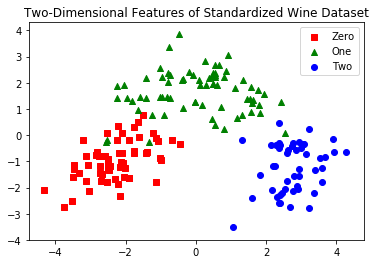

In [6]:
zeroX1 = list()
zeroY1 = list()
oneX1 = list()
oneY1 = list()
twoX1 = list()
twoY1 = list()

for i in range(len(samples)):
    if(labels[i] == 0):
        zeroX1.append(X_hat.T[i][0])
        zeroY1.append(X_hat.T[i][1])
    if(labels[i] == 1):
        oneX1.append(X_hat.T[i][0])
        oneY1.append(X_hat.T[i][1])
    if(labels[i] == 2):
        twoX1.append(X_hat.T[i][0])
        twoY1.append(X_hat.T[i][1])

zeroPlot = plt.scatter(zeroX1, zeroY1, color='r', marker='s', label='Zero')
onePlot = plt.scatter(oneX1, oneY1, color='g', marker='^', label='One')
twoPlot = plt.scatter(twoX1, twoY1, color='b', marker='o', label='Two')
plt.title('Two-Dimensional Features of Standardized Wine Dataset')
plt.legend(handles = [zeroPlot, onePlot, twoPlot], loc = 'upper right')

#### 5. In your opinion, based on the above two plots, which PCA features would lead to better classification performance?

The standardized (centered and normalized) is the better option for better classification performance because the data almost separated into their own "clusters" of groups corresponding to their labels. This will make it easier to differentiate the data samples.

### Naive Bayes Classification
#### 1. Build a three-class naive Bayes classifier that takes as input two-dimensional data and assumes each feature of the data to be conditionally Gaussian (i.e., Gaussian naive Bayes). You should assume that all classes are equally likely and that the class labels take values in the set {0, 1, 2}, as in the wine dataset.

In [7]:
# Calculate the gaussian pdf manually using mean and standard deviation.
def GaussianPDF(x, mean, std):
    exp = float(np.exp(-pow(x-mean,2)))/(2*pow(std,2))
    return float(1/np.sqrt(2*np.pi*pow(std,2)))*exp

def Classifier(trainData, labelSet, testSet):
    # PCA of the training data that has been split.
    U, s, Vt = np.linalg.svd(trainData)
    prinVal = U[:,0:2] #Use the top 2 principal components of the training data.
    features = np.matmul(prinVal.T, trainData)
    
    # Separate the labels by class according to their values.
    LabelData = np.zeros((len(labelSet),2))  
    for i in range(len(labelSet)):
        LabelData[i][0] = i
        LabelData[i][1] = labelSet[i]

    # Create separate classes for each value of labels.
    ZeroData = list()
    OneData = list()
    TwoData = list()
    for i in range(len(LabelData)):
        if(LabelData[i][1] == 0):
            ZeroData.append(i)
        if(LabelData[i][1] == 1):
            OneData.append(i)
        if(LabelData[i][1] == 2):
            TwoData.append(i)
            
    # Separate the classes by their XY coordinates by using the
    # labels to find which corresponding value in the features of the 
    # training data to use.
    classZeroX = []; classZeroY = []
    classOneX = []; classOneY = []
    classTwoX = []; classTwoY = []
    for i in range(len(ZeroData)):
        val = ZeroData[i]
        classZeroX.append(features[0][val])
        classZeroY.append(features[1][val])
    for i in range(len(OneData)):
        idx = OneData[i]
        classOneX.append(features[0][val])
        classOneY.append(features[1][val])
    for i in range(len(TwoData)):
        idx = TwoData[i]
        classTwoX.append(features[0][val])
        classTwoY.append(features[1][val])
    
    # Calculate the mean and standard deviation of each coordinate
    # for each class of values.
    meanZeroX = np.mean(classZeroX); meanZeroY = np.mean(classZeroY)
    stdZeroX = np.std(classZeroX); stdZeroY = np.std(classZeroY)
     
    meanOneX = np.mean(classOneX); meanOneY = np.mean(classOneY)
    stdOneX = np.std(classOneX); stdOneY = np.std(classOneY)
      
    meanTwoX = np.mean(classTwoX); meanTwoY = np.mean(classTwoY)
    stdTwoX = np.std(classTwoX); stdTwoY = np.std(classTwoY)
    
    # Perform PCA on the smaller test set and retrieve the top features.
    U, s, Vt = np.linalg.svd(testSet)
    prinValTest = U[:,0:2]
    testFeatures = np.matmul(prinValTest.T, testSet)
    
    # Make predicitions using Bayes principle.
    predVal = []
    for i in range(testFeatures.shape[1]):
        predZero = GaussianPDF(testFeatures[0][i],meanZeroX,stdZeroX)*GaussianPDF(features[1][i],meanZeroY,stdZeroY)
        predOne = GaussianPDF(testFeatures[0][i],meanOneX,stdOneX)*GaussianPDF(features[1][i],meanOneY,stdOneY)
        predTwo = GaussianPDF(testFeatures[0][i],meanTwoX,stdTwoX)*GaussianPDF(features[1][i],meanTwoY,stdTwoY)
        predictions = [predZero,predOne,predTwo]
        predVal.append(predictions.index(max(predictions)))
    return predVal

# Funcitons to split the datasets.
def splitData(valueSet, labelSet, b1, b2, b3):
    testSet = valueSet[:,b1:b2]
    testLabel = labelSet[b1:b2]
    trainSet = valueSet[:,b2:b3]
    trainLabel = labelSet[b2:b3]
    return testSet, testLabel, trainSet, trainLabel

def splitData2(valueSet, labelSet, b1,b2):
    testSet = valueSet[:,b1:b2]
    testLabel = labelSet[b1:b2]
    trainSet = np.column_stack((valueSet[:,0:b1], valueSet[:,b2:]))
    trainLabel = np.append(labelSet[:b1], labelSet[b2:])
    return testSet, testLabel, trainSet, trainLabel

# Count the errors made in the predictions by comparing to actual values.
def countError(prediction, labels):
    count = 0;
    for i in range(len(prediction)):
        if (prediction[i] != labels[i]):
            count = count +1
    return count

#### 2. Use Gaussian naive Bayes classifier for classification of the wine dataset using K-fold cross validation with K = 5 as follows:

#### Case I: Perform classification using your implementation of Gaussian naive Bayes classifier and two-dimensional PCA features of centered data only.

In [15]:
# Case I Centered Data

# Split the data in a ratio about 80% to 20% where there is larger training set.
testK1, testLabelsK1, trainK1, trainLabelsK1 = splitData(centData, labels, 0,36,178)
testK2, testLabelsK2, trainK2, trainLabelsK2 = splitData2(centData, labels, 36,72)
testK3, testLabelsK3, trainK3, trainLabelsK3 = splitData2(centData, labels, 72,108)
testK4, testLabelsK4, trainK4, trainLabelsK4 = splitData2(centData, labels, 108,143)
testK5 = centData[:,143:]
trainK5 = centData[:,0:143]
testLabelsK5 = labels[143:]
trainLabelsK5 = labels[:143]

# Make predictions for each K partition of the K-fold class validation.
predictionK1 = Classifier(trainK1, trainLabelsK1, testK1)
predictionK2 = Classifier(trainK2, trainLabelsK2, testK2)
predictionK3 = Classifier(trainK3, trainLabelsK3, testK3)
predictionK4 = Classifier(trainK4, trainLabelsK4, testK4)
predictionK5 = Classifier(trainK5, trainLabelsK5, testK5)

errors = list()
errors.append(countError(predictionK1, testLabelsK1))
errors.append(countError(predictionK2, testLabelsK2))
errors.append(countError(predictionK3, testLabelsK3))
errors.append(countError(predictionK4, testLabelsK4))
errors.append(countError(predictionK5, testLabelsK5))

Emean = np.mean(errors)
Evariance = np.var(errors)
print("Case I Results: ","\nErrors: :",errors,"\nMean: ",Emean,"\nVariance: ",Evariance)

Case I Results:  
Errors: : [7, 13, 36, 35, 35] 
Mean:  25.2 
Variance:  157.76


C:\Users\Mahmoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mahmoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
C:\Users\Mahmoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mahmoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Mahmoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in double_scalars


#### Case II: Perform classification using your implementation of Gaussian naive Bayes classifier and two-dimensional PCA features of standardized data.

In [14]:
# Case II Standardized Data
testK1, testLabelsK1, trainK1, trainLabelsK1 = splitData(normData, labels, 0,36,178)
testK2, testLabelsK2, trainK2, trainLabelsK2 = splitData2(normData, labels, 36,72)
testK3, testLabelsK3, trainK3, trainLabelsK3 = splitData2(normData, labels, 72,108)
testK4, testLabelsK4, trainK4, trainLabelsK4 = splitData2(normData, labels, 108,143)
testK5 = normData[:,143:]
trainK5 = normData[:,0:143]
testLabelsK5 = labels[143:]
trainLabelsK5 = labels[:143]

predictionK1 = Classifier(trainK1, trainLabelsK1, testK1)
predictionK2 = Classifier(trainK2, trainLabelsK2, testK2)
predictionK3 = Classifier(trainK3, trainLabelsK3, testK3)
predictionK4 = Classifier(trainK4, trainLabelsK4, testK4)
predictionK5 = Classifier(trainK5, trainLabelsK5, testK5)

def findError(prediction, labels):
    count = 0;
    for i in range(len(prediction)):
        if (prediction[i] != labels[i]):
            count = count +1
    return count

error = list()
error.append(findError(predictionK1, testLabelsK1))
error.append(findError(predictionK2, testLabelsK2))
error.append(findError(predictionK3, testLabelsK3))
error.append(findError(predictionK4, testLabelsK4))
error.append(findError(predictionK5, testLabelsK5))

Emean = np.mean(error)
Evariance = np.var(error)
print("Case II Results: ","\nErrors: :",error,"\nMean: ",Emean,"\nVariance: ",Evariance)


Case II Results:  
Errors: : [36, 23, 0, 13, 35] 
Mean:  21.4 
Variance:  185.83999999999997


C:\Users\Mahmoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mahmoud\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


#### Case III: Perform classification using sklearn’s implementation of Gaussian naive Bayes classifier (sklearn.naive_bayes.GaussianNB) and two-dimensional PCA features of standardized data.

In [13]:
# Case III 
from sklearn.naive_bayes import GaussianNB

def GNBClassifier(trainSet, trainLabelSet, testSet):
    Gauss = GaussianNB()
    Gauss.fit(trainSet.T, trainLabelSet)
    prediction = Gauss.predict(testSet.T)
    return prediction

error = list()
error.append(findError(GNBClassifier(trainK1, trainLabelsK1, testK1), testLabelsK1))
error.append(findError(GNBClassifier(trainK2, trainLabelsK2, testK2), testLabelsK2))
error.append(findError(GNBClassifier(trainK3, trainLabelsK3, testK3), testLabelsK3))
error.append(findError(GNBClassifier(trainK4, trainLabelsK4, testK4), testLabelsK4))
error.append(findError(GNBClassifier(trainK5, trainLabelsK5, testK5), testLabelsK5))

Emean = np.mean(error)
Evariance = np.var(error)
print("Case III Results: ","\nErrors: :",error,"\nMean: ",Emean,"\nVariance: ",Evariance)

Case III Results:  
Errors: : [2, 4, 2, 1, 3] 
Mean:  2.4 
Variance:  1.0400000000000003


####  3. Compare and contrast the mean and variance of the classification accuracy of the classifiers in Case I, Case II, and Case III.


In Case III, the results show the least amount of errors than the other cases. In the fourth iteration, there is only 1 error found and in the first and third iterations, only 2 errors found. Case II has the next best performance since we are using the standardized data. Although there were no errors found in the third iteration, there are still more total errors found than in Case III. Since the data is more differentiable/seperable than the centered data in Case I, we are able to see less errors in all partitions of the k-fold cross validation.